In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import plotly.express as px
import json
file_id = '~/downloads/gun_data_vis/shooting_1982-2023_cleaned1.csv'
gun_data = pd.read_csv(file_id)

In [2]:
len(gun_data)

141

# Gun Violence Visualization Using Mass Shootings

In [3]:
gun_data.head()

,case,location,date,summary,fatalities,injured,total_victims,location.1,age_of_shooter,prior_signs_mental_health_issues,...,year,quarter,half,month_name,day_of_week,age_group,decade,name,current_age,description
0,Nashville religious school shooting,"Nashville, TN",2023-03-27,"Audrey Hale, 28, who was a former student at t...",6,1,6,School,28,Unclear,...,2023,1,1,March,Monday,Early Adulthood,2020's,Audrey Hale,28,who was a former student at the private Coven...
1,Michigan State University shooting,"East Lansing, Michigan",2023-02-13,"Anthony D. McRae, 43, opened fire at Berkey Ha...",3,5,8,School,43,Unclear,...,2023,1,1,February,Monday,Middle Adulthood,2020's,Anthony D. McRae,43,opened fire at Berkey Hall and the MSU union
2,Half Moon Bay spree shooting,"Half Moon Bay, California",2023-01-23,"Chunli Zhao, 67, suspected of carrying out the...",7,1,8,Workplace,67,Unclear,...,2023,1,1,January,Monday,Old Age,2020's,Chunli Zhao,67,suspected of carrying out the attacks at a mu...
3,LA dance studio mass shooting,"Monterey Park, California",2023-01-21,"Huu Can Tran, 72, fled the scene in a white va...",11,10,21,Other,72,Yes,...,2023,1,1,January,Saturday,Old Age,2020's,Huu Can Tran,72,fled the scene in a white van and later shot ...
4,Virginia Walmart shooting,"Chesapeake, Virginia",2022-11-22,"Andre Bing, 31, who worked as a supervisor at ...",6,6,12,Workplace,31,Unclear,...,2022,4,2,November,Tuesday,Early Adulthood,2020's,Andre Bing,31,who worked as a supervisor at the store


Country Regulations: 	Restrictive, Permissive or None (NaN)
Estimate of Civilian Firearms: 	Civilian Firearms in Millions
Computation Method:	1 or 2 
Registered Firearms: 	# of Firearms Registered to Civilians
Unregistered Firearms: 	# of Unregistered Civilian Firearms 
Gun Death Rate:	Rate of Gun Deaths per Population
Deaths by Firearm: 	Deaths In Millions
Suicide by Firearm: 	Suicide In Millions
Unintentional Deaths by Firearms: 	Unintentional Deaths using Firearms Per 100k 
Police Killings: 	Deaths Using Firearms by Police
Rate Police Killings: 	Rate of Police Killings Per 10 M 
Data Year Police Killing: 	Year Data was Pulled


## Overview of CSV File: 'gun_data' 

### We have labeled and cleaned the data in order for Python to better search through our file.

In [4]:
gun_data.count()

case                                141
location                            141
date                                141
summary                             141
fatalities                          141
injured                             141
total_victims                       141
location.1                          141
age_of_shooter                      141
prior_signs_mental_health_issues    141
mental_health_details               141
weapons_obtained_legally            141
where_obtained                      141
weapon_type                         141
weapon_details                      140
race                                141
gender                              141
latitude                            141
longitude                           141
type                                141
year                                141
quarter                             141
half                                141
month_name                          141
day_of_week                         141


### In our data, we are missing less than a few pieces in some categories. This will have on affect on our data visualization. 

## Describing a Brief Overview of Our Data

### Filling Empty or 'Missing' Data

In [5]:
gun_data.isnull().sum()

case                                0
location                            0
date                                0
summary                             0
fatalities                          0
injured                             0
total_victims                       0
location.1                          0
age_of_shooter                      0
prior_signs_mental_health_issues    0
mental_health_details               0
weapons_obtained_legally            0
where_obtained                      0
weapon_type                         0
weapon_details                      1
race                                0
gender                              0
latitude                            0
longitude                           0
type                                0
year                                0
quarter                             0
half                                0
month_name                          0
day_of_week                         0
age_group                           2
decade      

In [25]:
gun_data.age_group.fillna({'age_group': 'Unknown'})

0       Early Adulthood
1      Middle Adulthood
2               Old Age
3               Old Age
4       Early Adulthood
             ...       
136    Middle Adulthood
137    Middle Adulthood
138    Middle Adulthood
139     Early Adulthood
140    Middle Adulthood
Name: age_group, Length: 141, dtype: object

In [41]:
gun_data = gun_data.fillna({'weapon_details': 'UNK' , 
                              'current_age':'gun_data.mean()',
                             'age_group': 'Pl'})

In [67]:
gun_data.isnull().sum()

case                                0
location                            0
date                                0
summary                             0
fatalities                          0
injured                             0
total_victims                       0
location.1                          0
age_of_shooter                      0
prior_signs_mental_health_issues    0
mental_health_details               0
weapons_obtained_legally            0
where_obtained                      0
weapon_type                         0
weapon_details                      0
race                                0
gender                              0
latitude                            0
longitude                           0
type                                0
year                                0
quarter                             0
half                                0
month_name                          0
day_of_week                         0
age_group                           0
decade      

## Describe function will show categories using 0 instead of NULL.

In [68]:
gun_data.describe()

,fatalities,injured,total_victims,age_of_shooter,latitude,longitude,year,quarter,half
count,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000
mean,7.808511,11.248227,19.049645,33.531915,37.400822,-96.205593,2010.382979,2.404255,1.460993
std,7.463162,46.571935,51.737569,13.726696,5.441899,17.642771,10.796600,1.140042,0.500253
min,3.000000,0.000000,3.000000,0.000000,21.320063,-157.876462,1982.000000,1.000000,1.000000
25%,4.000000,1.000000,6.000000,22.000000,33.850116,-117.043081,2005.000000,1.000000,1.000000
50%,6.000000,3.000000,10.000000,32.000000,38.135992,-88.902892,2014.000000,2.000000,1.000000
75%,8.000000,10.000000,17.000000,43.000000,41.412323,-81.376777,2018.000000,3.000000,2.000000
max,58.000000,546.000000,604.000000,72.000000,48.461367,-71.075913,2023.000000,4.000000,2.000000


#### This describe function is very powerful as it shows us a quick overview of the mean, std, min, max, and other useful percentages. 

#### The table above shows that the min amount of fatalities is 3 and the max is 58. It also shows the min age as and the max as 72 years old. 

## Visualizing Age Range Data 

### Creating a new list containing instances of age ranges from NIH.

In [109]:
np.array(gun_data.age_of_shooter).sort()
ages = sorted(gun_data.age_of_shooter)
teenage = 0
early_adulthood = 0
middle_adulthood = 0
old_age = 0
for age in ages:
    if age > 0 and age < 20:
        teenage += 1
    elif age > 19 and age < 30:
        early_adulthood += 1
    elif age > 29 and age < 60:
        middle_adulthood += 1
    elif age > 59:
        old_age += 1

In [110]:
x = [teenage, early_adulthood, middle_adulthood, old_age]
labels = ['Teenage','Early Adulthood', 'Middle Adulthood', 'Old Age']
labels

['Teenage', 'Early Adulthood', 'Middle Adulthood', 'Old Age']

In [115]:
x

[16, 48, 69, 6]

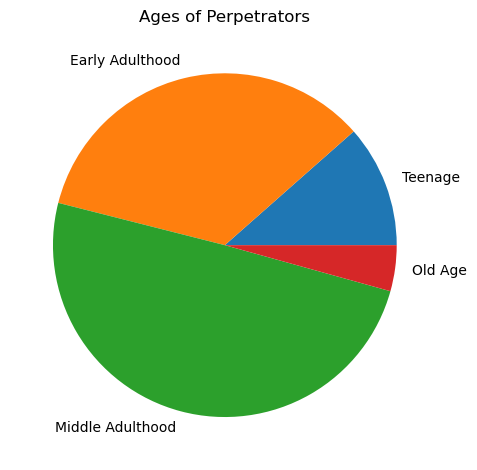

In [114]:
plt.pie(x, labels = labels)
plt.title('Ages of Perpetrators')
plt.tight_layout()

In [135]:
np.array(gun_data.weapons_obtained_legally).sort()
legals = sorted(gun_data.weapons_obtained_legally)

In [136]:
legally_obtained = 0
unknown = 0
illegally_obtained = 0
for legal in legals:
    if legal == 'No':
        illegally_obtained += 1
    elif legal == 'Yes':
        legally_obtained += 1
    else:
        unknown += 1
lo = [legally_obtained, illegally_obtained, unknown]
label2 = ['Legally Obtained', 'Illegally Obtained', 'Unknown']

## Vast majority of weapons obtained were legally obtained.

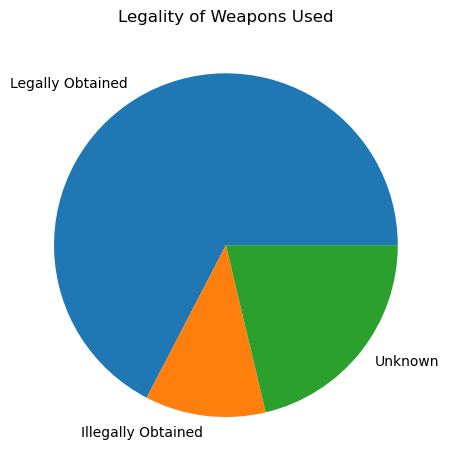

In [137]:
plt.pie(lo, labels = label2)
plt.title('Legality of Weapons Used')
plt.tight_layout()

In [11]:
gun_data.age_group.describe()

count                 139
unique                  4
top       Early Adulthood
freq                   79
Name: age_group, dtype: object

In [12]:
gun_data.location.describe()

count                            141
unique                           130
top       Colorado Springs, Colorado
freq                               3
Name: location, dtype: object

In [13]:
gun_data_geo = gpd.GeoDataFrame(gun_data, geometry = gpd.points_from_xy(gun_data.longitude, gun_data.latitude))

In [14]:
state_regulation = pd.read_csv('~/downloads/gun_data_vis/state_regulations_cleaned_copy.csv')
state_regulation

,State,State_Code,Firearm_Type_Law,Background_check
0,Alabama,AL,None,None
1,Alaska,AK,None,None
2,Arizona,AZ,None,None
3,Arkansas,AR,None,None
4,California,CA,"All firearms (handguns, rifles, and shotguns)",Point-of-sale
5,Colorado,CO,"All firearms (handguns, rifles, and shotguns)",Point-of-sale
6,Connecticut,CT,"All firearms (handguns, rifles, and shotguns)",Permit to purchase and point-of-sale
7,Delaware,DE,"All firearms (handguns, rifles, and shotguns)",Point-of-sale
8,Florida,FL,None,None
9,Georgia,GA,None,None


In [145]:
gdatas = state_regulation.Background_check
no_bgc = 0
for gdata in gdatas:
    if gdata == 'None':
        no_bgc += 1
no_bgc

30

## Out of 50 states, 30 are not requiring background checks (including mental health inquiries). 

In [162]:
gun_data.prior_signs_mental_health_issues.describe()

count     141
unique      4
top       Yes
freq       66
Name: prior_signs_mental_health_issues, dtype: object

In [163]:
mentalhs = gun_data.prior_signs_mental_health_issues
mental_health_appeared = 0 
no_signs = 0 
for mentalh in mentalhs:
    if mentalh == 'Yes':
        mental_health_appeared += 1
    else:
        no_signs += 1
mental_health = [mental_health_appeared, no_signs]
label3 = ['Prior Signs of Mental Health Issue', 'No Notated Signs']

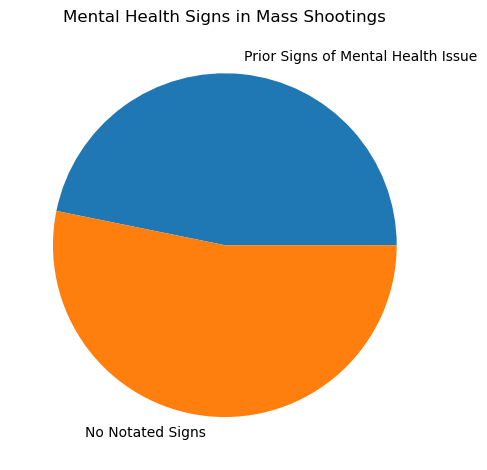

In [164]:
plt.pie(mental_health, labels = label3)
plt.title('Mental Health Signs in Mass Shootings')
plt.tight_layout()

In [166]:
fig = px.choropleth(state_regulation, 
                    locations = 'State_Code ',
                    locationmode = 'USA-states',
                    scope = 'usa',
                    color = 'Firearm_Type_Law',
                    hover_name = 'State',
                    hover_data = ['Background_check', 'Firearm_Type_Law'],
                    range_color = [0,3],
                    color_continuous_scale = 'blue',
                    title = 'Gun Regulations in USA')
fig

Text(0.5, 1.0, 'National Cases')

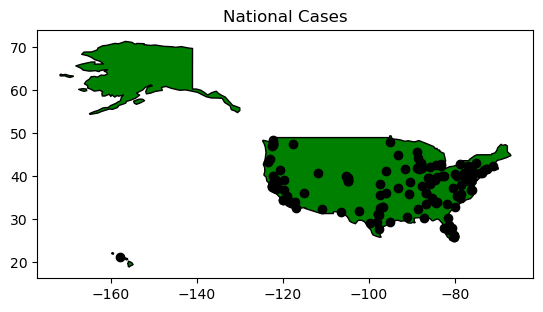

In [47]:
data = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
USA = data.loc[data['name'] == 'United States of America']
boundaries = USA['geometry'] 
axis = USA.plot(
color = 'green', edgecolor = 'black')
gun_data_geo.plot(ax = axis, color = 'black')
plt.title('National Cases')


# Closing Remarks

### Based on the visualization presented above, it is found that more mass shootings have been commited by middle aged adults using legally obtained guns. 

### States are more likely to not need mental health checks, background checks, registration, and stricter laws based on the gun type. 

### Throughout my data visualization process, it was easy to see what figures most affected the question athand. This allowed me to create a couple of charts that highlight where the violence is and the gun laws in that area.